In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,text,reason,label
0,the app is crashing when i play a vedio,app crashes during playback,1.0
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0.0
2,very helpful when and home working remotley,good app for work,0.0
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0.0
4,one of my favorite apps,good for spending time,0.0
...,...,...,...
11997,NaN,NaN,NaN
11998,NaN,NaN,NaN
11999,NaN,NaN,NaN
12000,NaN,NaN,NaN


In [4]:
df = df.dropna(subset=['text', 'reason', 'label'])

In [5]:
df

,text,reason,label
0,the app is crashing when i play a vedio,app crashes during playback,1.0
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0.0
2,very helpful when and home working remotley,good app for work,0.0
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0.0
4,one of my favorite apps,good for spending time,0.0
...,...,...,...
8995,very good streaming platform has a lot of content,app has very good content,1.0
8996,so paying for an app that is not fit for purpose.,unable to use app,0.0
8997,"it does not work well for me, it loads, but if...",app keeps loading indefinitely,0.0
8998,i can not watch the new disney shows.,unable to load the episodes list,0.0


In [6]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
reason = df.reason.str.cat(sep=' ')
tokens = word_tokenize(reason)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

785


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abhinavsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['to',
 'app',
 'good',
 'unable',
 'for',
 'is',
 'want',
 'use',
 'the',
 'movies',
 'not',
 'on',
 'conducting',
 'and',
 'meeting',
 'online',
 'with',
 'subscription',
 'video',
 'watching',
 'getting',
 'quality',
 'videos',
 'watch',
 'play',
 'content',
 'ads',
 'login',
 'bad',
 'serials',
 'meetings',
 'update',
 'issues',
 'facing',
 'of',
 'download',
 'zoom',
 'slow',
 'tv',
 'connect',
 'streaming',
 'disney',
 'audio',
 'classes',
 'shows',
 'has',
 'load',
 'work',
 'in',
 'connecting']

In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhinavsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


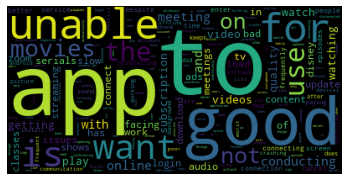

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [9]:
X_train = df.loc[:8000, 'reason'].values
y_train = df.loc[:8000, 'label'].values
X_test = df.loc[8001:, 'reason'].values
y_test = df.loc[8001:, 'label'].values

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(8001, 761) (999, 761)


In [11]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [12]:
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted) * 100) 

69.06906906906907
